In [1]:
import numpy as np
import scipy.stats as st
from tqdm import *
from sklearn import datasets, linear_model
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
tot_v1 = 0
tot_vrand = 0
tot_vmin = 0

In [3]:
num_runs = 1000
num_coins = 1000
num_flips = 10
 
for n in tqdm(xrange(num_runs)):
    coins = []
    for i in xrange(num_coins):
        coins.append([])
        for j in xrange(num_flips):
            coins[i].append([])
            coins[i][j] = np.random.choice(2,1)
    
    ndarr = np.array(coins).reshape(1000,10)
    random_num = np.random.randint(low=0,high=999,size=1)[0]
    
    v1 = ndarr[0]
    tot_v1 += v1[v1 == 1].size / float(10)
    
    vrand = ndarr[random_num]
    tot_vrand += vrand[vrand == 1].size / float(10)
    
    tot_vmin += np.min([x.sum() for x in ndarr]) / float(10)
    
print tot_v1 / float(num_runs)
print tot_vrand / float(num_runs)    
print tot_vmin / float(num_runs)    

100%|██████████| 1000/1000 [02:59<00:00,  5.63it/s]

0.5001
0.5004
0.0417


In [4]:
row = ndarr[0]
row[row == 1].size / float(10)

np.min([x.sum() for x in ndarr])


0

In [5]:
np.random.randint(low=0,high=999,size=1)

array([483])

In [29]:
def make_fx(x1,y1,x2,y2):
    slope = (y2-y1) / float(x2-x1)
    intercept = y1 - slope * x1  
   
    def func(x):
        return slope * x + intercept
    
    print "func is {0}x + {1}".format(slope,intercept)
    
    return (func,slope,intercept)
    

In [206]:
# assign a label to every sample, depending on whether
# the y is above or below the actual y given by the target function
def mk_dataset(target_func,inputs):
    
    dataset = []
    
    for input_sample in inputs:
        x = input_sample[0]
        y = input_sample[1]
        
        actual_y = target_func(x)
        
        if(y > actual_y):
            label = 1
        else:
            label = 0
            
        dataset.append([x,y,label])    
        
        
    return np.array(dataset).reshape(len(inputs),3)    
        

  0%|          | 0/1 [00:00<?, ?it/s]


func is 0.98015862568x + -0.74754352049
final avg: nan


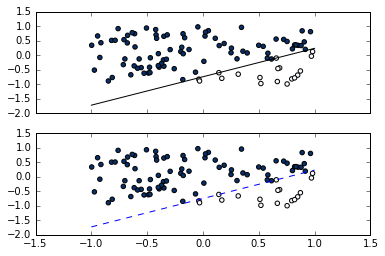

In [214]:
N = 100
data = []

for n in trange(N):
    x = np.random.uniform(low=-1,high=1)
    y = np.random.uniform(low=-1,high=1)
    data.append((x,y))
    
mat = np.array(data)

num_runs = 1

f, axarr = plt.subplots(2, sharex=True)

gs = []
fraction_correct = []

for i in trange(num_runs):
    
    tot_correct = 0
    tot_wrong = 0
    
    (pt1,pt2) = mat[np.random.choice(N,2,replace=False)]
      
#     print 'points are {0} and {1}'.format(pt1,pt2)    
        
    (f,m,b) = make_fx(pt1[0],pt1[1],pt2[0],pt2[1])
    
    xx = np.linspace(-1,1)
    yy = m * xx + b
    
    axarr[0].plot(xx,yy,'k-')
          
    dataset = mk_dataset(f,mat)

    axarr[0].scatter(mat[:,0],mat[:,1],c=dataset[:,2],cmap='Blues')
    axarr[1].scatter(mat[:,0],mat[:,1],c=dataset[:,2],cmap='Blues')
    
    xs = dataset[:,1].reshape(-1,1)
    ys = [ f(x) for x in xs ]
    
    regr = linear_model.LinearRegression()
    regr.fit(xs,ys)
    
    
#     print 'learned function had coefficients: {0} and intercept {1}'.format(regr.coef_, regr.intercept_)       
        
    m = regr.coef_[0]
    xx = np.linspace(-1, 1)
    yy = m * xx + (regr.intercept_)
    
    axarr[1].plot(xx,yy,'b--')
    
    break
    
    fresh_data = []
    
    for n in xrange(N):
        x = np.random.uniform(low=-1,high=1)
        y = np.random.uniform(low=-1,high=1)
        fresh_data.append((x,y))
  
    fresh_mat = np.array(fresh_data)
    
    fresh_dataset = mk_dataset(f,fresh_mat)
    
    for (idx,input_row) in enumerate(fresh_dataset):
        
        x = input_row[0]
        y = input_row[1]
        label = input_row[2]
        
        predicted_threshold = regr.predict(np.array([x]).reshape(1,-1))[0]
                
        actual_threshold = f(x)
                   
        if(y >= predicted_threshold and y < actual_threshold ):
            tot_wrong += 1
        elif( y <= predicted_threshold and y > actual_threshold):
            tot_wrong += 1
        else:
            tot_correct += 1
            
            
    frac = tot_correct / float(tot_correct+tot_wrong)        
    fraction_correct.append(frac)    
    print "fraction correct was: {0:.3f}".format(frac)

print 'final avg: {0}'.format(np.mean(fraction_correct))
    

In [ ]:
mat = np.array([[1,1,1,9],[2,2,2,9],[3,3,3,9],[4,4,4,9]])
mat[:,[0,1]]

regr.predict(np.array([1,0]).reshape(1,-1))


In [190]:
N = 10000
data = []

for n in trange(N):
    x = np.random.uniform(low=-1,high=1)
    y = np.random.uniform(low=-1,high=1)
    data.append((x,y))
    
mat = np.array(data)

new_mat = []

for input_sample in mat:
    x1 = input_sample[0]
    x2 = input_sample[1]
    
    
    f = x**2 + y**2 - 0.6
    
    new_mat.append([x1,x2,x1*x2,x1**2,x2**2,f])
    
matrix = np.array(new_mat).reshape(N,6)

indexes_to_flip = np.random.choice(N,N/10,replace=False)

for idx in indexes_to_flip:
    matrix[idx][5] = matrix[idx][5] * (-1)

xs = matrix[:,[0,1,2,3,4]]
ys = matrix[:,5]
regr = linear_model.LinearRegression()
regr.fit(xs,ys)   

errors = []

for input_sample in xs:
    predicted = regr.predict(input_sample.reshape(1,-1))
    x = input_sample[0]
    y = input_sample[1]
    
    actual = x**2 + y**2 - 0.6
    
    errors.append(np.abs(predicted-actual))
    
print 'total avg: {0}'.format(np.mean(errors))   

regr.intercept_,regr.coef_

100%|██████████| 10000/10000 [00:00<00:00, 739318.90it/s]


total avg: 0.376761542856


(-0.16422461753514911,
 array([ 0.00133508, -0.00143433,  0.00975664,  0.00404598,  0.00184058]))

total avg: 0.361429828509
